***MODEL PREPARATION and TRAINING***

**OBJECTIVE: Train basic ML models on the processed features to predict future stock prices or trends**

Step 1: Define the Target Variables.

Regression: Predict future "Close" Price

Classification: Predict price going Up (1) or Down (0) the next day.

In [2]:
import pandas as pd

df = pd.read_pickle('data/processed/processed_reliance_data.pk1')
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2368 entries, 2015-05-29 to 2024-12-31
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Close              2368 non-null   float64
 1   High               2368 non-null   float64
 2   Low                2368 non-null   float64
 3   Open               2368 non-null   float64
 4   Volume             2368 non-null   int64  
 5   Daily Returns      2368 non-null   float64
 6   Price Range        2368 non-null   float64
 7   Range %            2368 non-null   float64
 8   MA5                2368 non-null   float64
 9   MA10               2368 non-null   float64
 10  MA20               2368 non-null   float64
 11  MA50               2368 non-null   float64
 12  MA100              2368 non-null   float64
 13  StdDev5            2368 non-null   float64
 14  StdDev10           2368 non-null   float64
 15  Lag_1              2368 non-null   float64
 16  Lag_2 

Step 2: Prepare Feature Matrix X and Target y

In [22]:
x = df[['Volume', 'Daily Returns', 'Lag_1', 'Lag_2', 'MA100']]
y = df['Close']
x.head()

Price,Volume,Daily Returns,Lag_1,Lag_2,MA100
Date,,,,,
2015-05-29,29277517,0.001370,194.620224,196.731308,192.875860
2015-06-01,19594976,0.028791,194.886902,194.620224,192.932299
2015-06-02,20178960,-0.003990,200.497925,194.886902,192.985894
2015-06-03,15546279,-0.002559,199.697937,200.497925,193.055667
2015-06-04,15931395,0.018241,199.186859,199.697937,193.249005


Step 3 : Train-Test Split

In [23]:
x = x.sort_index()
y = y.sort_index()

In [24]:
# No shuffling, order is preserved
split = int(len(x) * 0.8)
x_train, x_test = x[:split], x[split:]
y_train, y_test = y[:split], y[split:]


In [25]:
y_test.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 474 entries, 2023-01-25 to 2024-12-31
Series name: Close
Non-Null Count  Dtype  
--------------  -----  
474 non-null    float64
dtypes: float64(1)
memory usage: 7.4 KB


Step 4 : Choose and train ML models

1. Linear Regression

2. Decision Tree Regressor

3. Random Forest Regressor

In [26]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

Step 5: Make Predictions

In [27]:
import pandas as pd

predictions = model.predict(x_test)
pred_series = pd.Series(predictions.flatten(), index = y_test.index)
pred_series.info()
pred_series

<class 'pandas.core.series.Series'>
DatetimeIndex: 474 entries, 2023-01-25 to 2024-12-31
Series name: None
Non-Null Count  Dtype  
--------------  -----  
474 non-null    float64
dtypes: float64(1)
memory usage: 7.4 KB


Date
2023-01-25    1098.922821
2023-01-27    1079.918663
2023-01-30    1076.746717
2023-01-31    1080.213268
2023-02-01    1075.215480
                 ...     
2024-12-24    1223.425095
2024-12-26    1220.096701
2024-12-27    1219.224164
2024-12-30    1216.416734
2024-12-31    1213.437500
Length: 474, dtype: float64

Step 6: Evaluate the model

In [28]:
from sklearn.metrics import mean_squared_error, r2_score

print('MSE: ', mean_squared_error(y_test, pred_series))
print('R² Score: ', r2_score(y_test, pred_series))

MSE:  87.69273369687347
R² Score:  0.9962708429265683


Step 7: Visualize Actual vs Predicted

In [29]:
print(y_test.shape)
print(pred_series.shape)

(474,)
(474,)


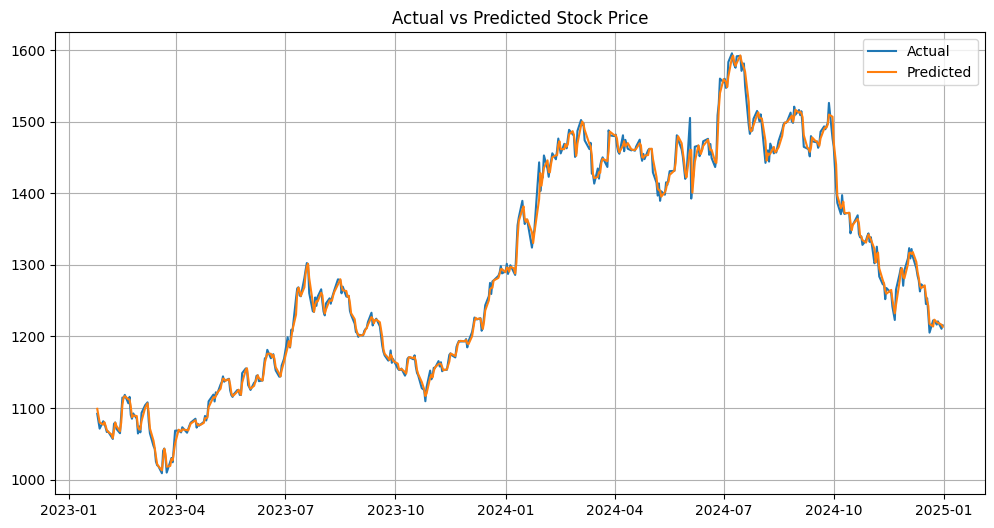

In [30]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12,6))
plt.plot(y_test.index, y_test.values, label='Actual')
plt.plot(y_test.index, pred_series, label='Predicted')
plt.title("Actual vs Predicted Stock Price")
plt.legend()
plt.grid(True)
plt.show()

In [31]:
print(np.allclose(y_test.values.flatten(), predictions.flatten()))


False


In [32]:
# Combine into one DataFrame
comparison_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': pred_series
})

# Preview first few rows
print(comparison_df.head(10))

                 Actual    Predicted
Date                                
2023-01-25  1091.969849  1098.922821
2023-01-27  1071.253784  1079.918663
2023-01-30  1081.520264  1076.746717
2023-01-31  1078.816040  1080.213268
2023-02-01  1072.422607  1075.215480
2023-02-02  1066.487305  1069.131485
2023-02-03  1067.426880  1066.863706
2023-02-06  1059.383301  1063.028340
2023-02-07  1056.839600  1057.943340
2023-02-08  1077.945312  1069.112268
